In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Load the Excel file
upload = files.upload()
file_path = "Sleep Vs Concentration Analysis (Responses).csv"
df = pd.read_csv(file_path)
df.columns = ["Timestamp", "Gender", "Sleep_Hours", "Naps", "Device_Use", "Stress_Level", "Concentration_Level"]
df.info()
print("-------------------------")
print(df.head())

Saving Sleep Vs Concentration Analysis (Responses).csv to Sleep Vs Concentration Analysis (Responses) (8).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            54 non-null     object 
 1   Gender               54 non-null     object 
 2   Sleep_Hours          54 non-null     float64
 3   Naps                 54 non-null     object 
 4   Device_Use           54 non-null     object 
 5   Stress_Level         54 non-null     object 
 6   Concentration_Level  54 non-null     object 
dtypes: float64(1), object(6)
memory usage: 3.1+ KB
-------------------------
           Timestamp  Gender  Sleep_Hours                          Naps  \
0  3/7/2025 22:12:34    Male          7.0  Sometimes (3-4 times a week)   
1  3/7/2025 22:18:24    Male          5.5     Rarely (1-2 times a week)   
2  3/7/2025 22:21:30  Female       

In [39]:
# Apply filters
filtered_df = df[
    (~df["Naps"].isin(["Daily", "Often (5+ times a week)"])) &
    (~df["Device_Use"].isin(["1-2 hours"])) &
    (~df["Stress_Level"].isin(["7-8 (High)", "9-10 (Very High)"]))
].copy()

# Convert numeric columns to appropriate types
filtered_df["Sleep_Hours"] = pd.to_numeric(filtered_df["Sleep_Hours"], errors='coerce')
filtered_df["Concentration_Level"] = pd.to_numeric(filtered_df["Concentration_Level"].str[0], errors='coerce')

# Calculate statistics
sleep_mean = filtered_df["Sleep_Hours"].mean()
sleep_median = filtered_df["Sleep_Hours"].median()
sleep_mode = filtered_df["Sleep_Hours"].mode().iloc[0] if not filtered_df["Sleep_Hours"].mode().empty else None

concentration_mean = filtered_df["Concentration_Level"].mean()
concentration_median = filtered_df["Concentration_Level"].median()
concentration_mode = filtered_df["Concentration_Level"].mode().iloc[0] if not filtered_df["Concentration_Level"].mode().empty else None

# Print results
print(f"Sleep Hours - Mean: {sleep_mean:.2f}, Median: {sleep_median}, Mode: {sleep_mode}")
print(f"Concentration Level - Mean: {concentration_mean:.2f}, Median: {concentration_median}, Mode: {concentration_mode}")


Sleep Hours - Mean: 6.64, Median: 7.0, Mode: 7.0
Concentration Level - Mean: 2.96, Median: 3.0, Mode: 3


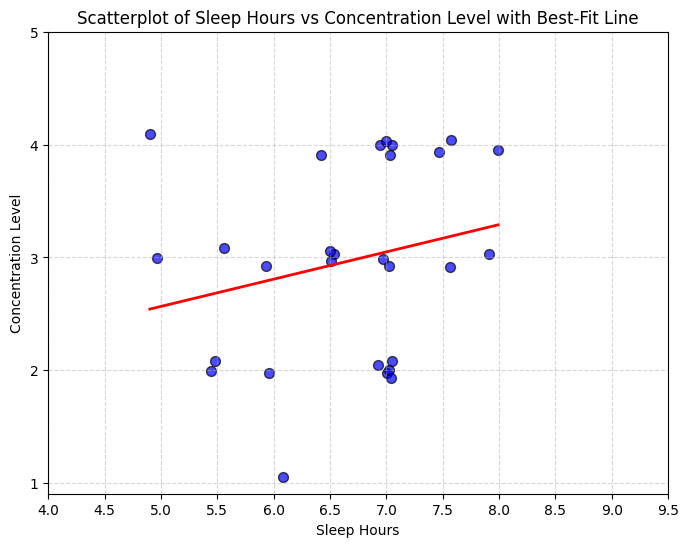

In [40]:
# Add small random noise (jittering) to avoid overlapping dots
filtered_df["Sleep_Hours_Jitter"] = filtered_df["Sleep_Hours"] + np.random.uniform(-0.1, 0.1, len(filtered_df))
filtered_df["Concentration_Level_Jitter"] = filtered_df["Concentration_Level"] + np.random.uniform(-0.1, 0.1, len(filtered_df))

# Create scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered_df, x="Sleep_Hours_Jitter", y="Concentration_Level_Jitter",
            scatter_kws={"color": "blue", "edgecolor": "black", "s": 50, "alpha": 0.7},
            line_kws={"color": "red", "linewidth": 2},
            ci=None)

# Labels, title, and grid
plt.xlabel("Sleep Hours")
plt.ylabel("Concentration Level")
plt.title("Scatterplot of Sleep Hours vs Concentration Level with Best-Fit Line")
plt.xticks(np.arange(4, 10, 0.5))
plt.yticks(np.arange(1, 6, 1))
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

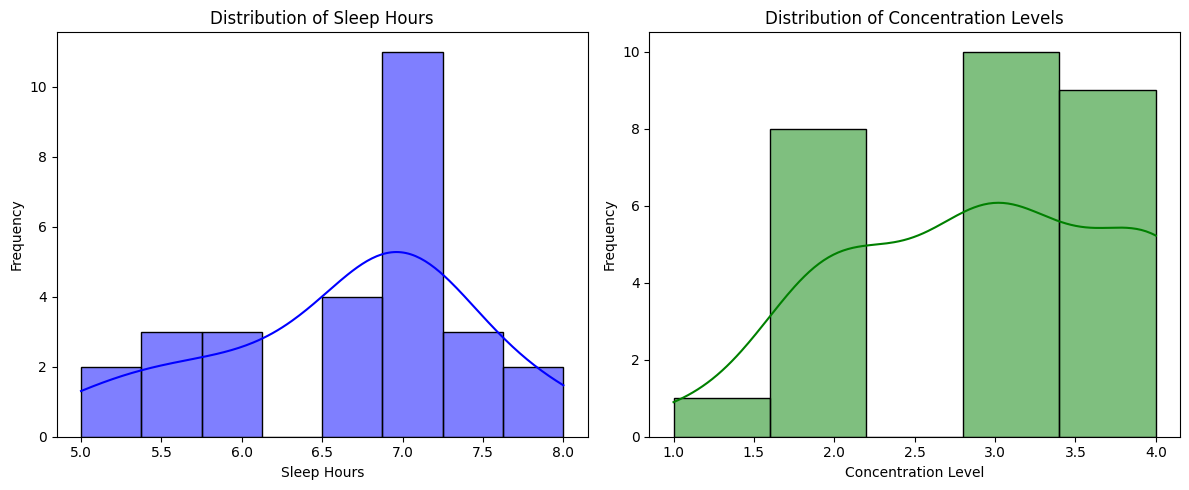

In [42]:
# Create histograms
plt.figure(figsize=(12, 5))

# Histogram for Sleep Hours
plt.subplot(1, 2, 1)
sns.histplot(filtered_df["Sleep_Hours"], bins=8, kde=True, color="blue")
plt.xlabel("Sleep Hours")
plt.ylabel("Frequency")
plt.title("Distribution of Sleep Hours")

# Histogram for Concentration Levels
plt.subplot(1, 2, 2)
sns.histplot(filtered_df["Concentration_Level"], bins=5, kde=True, color="green")
plt.xlabel("Concentration Level")
plt.ylabel("Frequency")
plt.title("Distribution of Concentration Levels")

plt.tight_layout()
plt.show()